# Breast Cancer Proteomes Analysis

### Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
#### import dataset
dataset_url = 'https://www.kaggle.com/piotrgrabo/breastcancerproteomes' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anubratadas
Your Kaggle Key: ········


100%|██████████| 5.27M/5.27M [00:00<00:00, 67.0MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './breastcancerproteomes'

In [5]:
import os
os.listdir(data_dir)

['77_cancer_proteomes_CPTAC_itraq.csv',
 'clinical_data_breast_cancer.csv',
 'PAM50_proteins.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "breast_cancer_proteomes_jovian_project" # change this (use lowercase letters and hyphens only)

In [7]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-jovian-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project


'https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project'

## Data Preparation and Cleaning

#### This is a Cancer Proteome Data

#### we shall fill NA values with mean

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mv breastcancerproteomes/*.* .

In [10]:
proteome=pd.read_csv('77_cancer_proteomes_CPTAC_itraq.csv',header=0)

In [11]:
proteome.head(n=3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [12]:
proteome.shape

(12553, 86)

In [13]:
data_type=proteome.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,float64,83
1,object,3


### OBSERVATION
#### The dataset has 12553 rows and 86 columns.
#### Here there are 83 samples with their identifiers. There are 12553 Proteins(identified by their genes). 
#### Thus format is rows as features and columns as samples
#### To make it biologically meaningful, we have to reshape the data to the conventional rows as samples and columns as features

In [14]:
ls

77_cancer_proteomes_CPTAC_itraq.csv             clinical_data_breast_cancer.csv
breastcancerproteomes/                          environment.yml
breast_cancer_proteomes_jovian_project-1.ipynb  PAM50_proteins.csv


In [15]:
proteins=proteome.RefSeq_accession_number.tolist()

In [16]:
proteome_samples=proteome.iloc[:,3:]
proteome_samples.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [19]:
proteome_samples=proteome_samples.transpose()
proteome_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [20]:
proteome_samples.columns=proteins

In [21]:
reshaped_proteome=proteome_samples

##### we have reshaped the dataset as features (Proteins) as columns and samples as rows. The Refseq accession numbers are permanent and can be used to access the database and hence were used as column descriptors. The  protein names can be easily obtained from Refseq and hence Gene_symbol and Gene_name are removed for further analysis

In [22]:
reshaped_proteome.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


##### get NA values

In [23]:
for col in reshaped_proteome.columns:
    x=reshaped_proteome[col].isna().sum()
    if x!=0:
        print(f'{col} has {x} NA values')

NP_067047 has 19 NA values
NP_060227 has 9 NA values
NP_055796 has 2 NA values
NP_001156806 has 13 NA values
NP_000251 has 16 NA values
NP_001094891 has 15 NA values
NP_057323 has 52 NA values
NP_001138722 has 42 NA values
NP_443141 has 41 NA values
NP_055185 has 9 NA values
NP_001164655 has 15 NA values
NP_596870 has 7 NA values
NP_001229542 has 59 NA values
NP_001138668 has 60 NA values
NP_001014364 has 53 NA values
NP_055107 has 6 NA values
XP_003960896 has 3 NA values
XP_003960532 has 53 NA values
NP_001138599 has 2 NA values
NP_055710 has 5 NA values
NP_115645 has 31 NA values
NP_940980 has 16 NA values
NP_055458 has 1 NA values
NP_008995 has 20 NA values
NP_031382 has 12 NA values
NP_006050 has 6 NA values
NP_115927 has 21 NA values
NP_057613 has 4 NA values
NP_258259 has 2 NA values
NP_149022 has 15 NA values
NP_878905 has 7 NA values
NP_005541 has 3 NA values
NP_065867 has 12 NA values
NP_659464 has 14 NA values
NP_008832 has 2 NA values
NP_005550 has 12 NA values
NP_001075031 

In [24]:
reshaped_proteome.mean()

NP_958782       0.320232
NP_958785       0.326915
NP_958786       0.326425
NP_000436       0.323683
NP_958781       0.327083
                  ...   
NP_001191293   -3.727669
NP_775791      -0.696448
NP_004065      -0.585666
NP_068752      -0.640042
NP_219494      -1.289686
Length: 12553, dtype: float64

##### NA values filled with mean

In [25]:
reshaped_proteome=reshaped_proteome.fillna(reshaped_proteome.mean())

In [26]:
reshaped_proteome.isna().sum().sort_values(ascending=False)

NP_219494       0
NP_056936       0
NP_001243582    0
NP_001258777    0
NP_942596       0
               ..
NP_001263302    0
NP_003358       0
NP_000472       0
NP_061893       0
NP_958782       0
Length: 12553, dtype: int64

##### The last 3 samples are healthy tissue.We have created a column 'Type', and labelled cancer tissue 
##### as 0 and healthy tissue as 1 

In [28]:
reshaped_proteome['Type']=0
reshaped_proteome.iloc[-3:,-1]=1

##### tumor samples type

In [29]:
reshaped_proteome.iloc[:3,-1]

AO-A12D.01TCGA    0
C8-A131.01TCGA    0
AO-A12B.01TCGA    0
Name: Type, dtype: int64

##### normal samples

In [30]:
reshaped_proteome.iloc[-3:,-1]

263d3f-I.CPTAC    1
blcdb9-I.CPTAC    1
c4155b-C.CPTAC    1
Name: Type, dtype: int64

##### Let us see the distribution of amount of proteins in the Dataset

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-jovian-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project


'https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [34]:
reshaped_proteome.Type.value_counts()

0    80
1     3
Name: Type, dtype: int64

In [35]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [36]:
plt.rcParams.update({'font.size': 22})

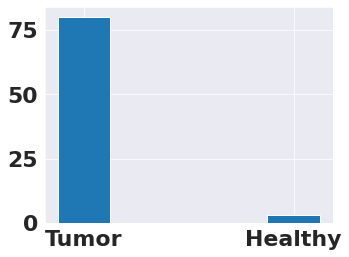

In [37]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
Type = ['Tumor', 'Healthy']
value = [80,3]
ax.bar(Type,value,width=0.25)
plt.show()

#### This is an imbalanced dataset with 2 classes

##### Let us see the distribution of amount of proteins in the tumor samples

In [38]:
# we are choosing only tumor samples
tumor_proteome=reshaped_proteome.iloc[:-3,:]
tumor_proteome.shape

(80, 12554)

In [39]:
tumor_mean_list=tumor_proteome.mean().values.tolist()

<AxesSubplot:xlabel='Amount of Protein'>

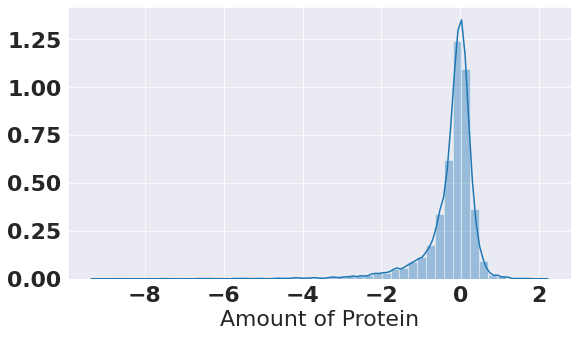

In [40]:
sns.distplot(tumor_mean_list,hist=True,axlabel="Amount of Protein")

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [41]:
tumor_std_list=tumor_proteome.std().values.tolist()

<AxesSubplot:xlabel='Standard Deviation'>

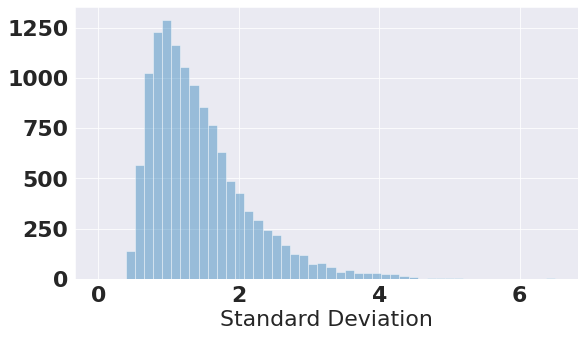

In [42]:
sns.distplot(tumor_std_list,hist=True,kde=False,axlabel="Standard Deviation")

###### Data shows Normal Distribution with right skew

#####  since these are iTRAQ values, any value less than zero is meaningless. Hence we shall remove those columns (Proteins)

In [43]:
tc=tumor_proteome.columns
x=tumor_proteome.mean()>0
tumor_proteome_positive=tc[x]

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

##### modifying the dataset to have Proteins with only positive mean values

In [44]:
reshaped_proteome_positive=reshaped_proteome[tumor_proteome_positive]

###### Now let us see the variance in this dataset

In [45]:
reshaped_proteome_positive.shape

(83, 5082)

#### re-plotting the standard deviation in the dataset

In [46]:
pos_prot_lst=reshaped_proteome_positive.std().values.tolist()

<AxesSubplot:xlabel='Standard Deviation'>

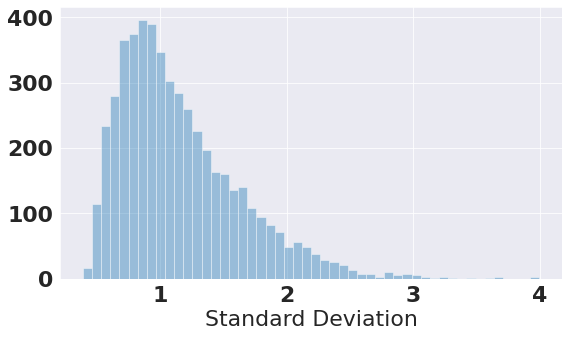

In [47]:
sns.distplot(pos_prot_lst,hist=True,kde=False,axlabel="Standard Deviation")

##### The right skew is reduced and data is within the acceptable 3 Std.Deviations

##### adding the Type column to the dataset reshaped_proteome_positive

In [48]:
reshaped_proteome_positive['Type']=0
reshaped_proteome_positive.iloc[-3:,-1]=1

<ipython-input-48-e4009ae37efc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_proteome_positive['Type']=0
/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [49]:
mean_proteins=reshaped_proteome_positive.mean().sort_values(ascending=False)
mean_proteins.shape

(5083,)

###  since this is a large dataset, let us choose a subset. Let us see the topmost 10% abundant proteins

In [50]:
top_500=mean_proteins[:500].index

In [51]:
top_500=reshaped_proteome_positive[top_500]
top_500.shape

(83, 500)

In [52]:
# build a correlation matrix
top_corr=top_500.corr()

<AxesSubplot:>

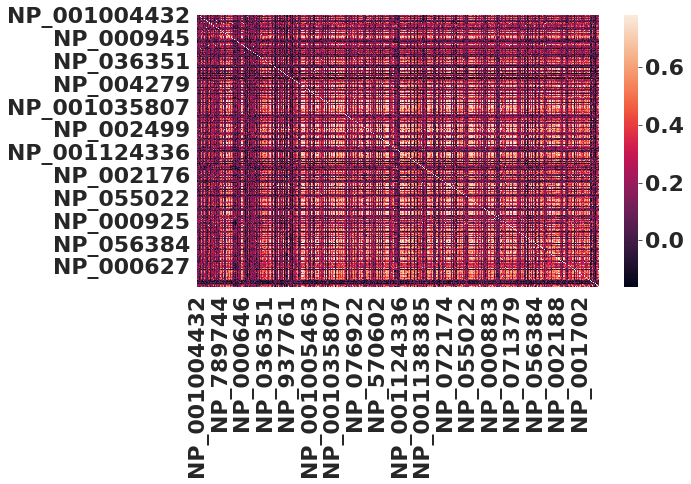

In [53]:
sns.heatmap(top_corr,robust=True)

#### All values where correlation < 0.8 are set to 0 to highlight highly correlating protein abundances 

In [54]:
rev_top_corr=top_corr.where(top_corr>0.8,0)

<AxesSubplot:>

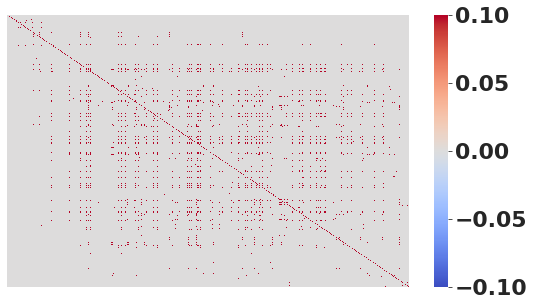

In [56]:
sns.heatmap(rev_top_corr,robust=True,cmap="coolwarm",yticklabels=False,xticklabels=False)

#### we have checked the top 10% abundant proteins and there is very limited correlation indicating there is no sample specific variation and all variation is genuine

In [57]:
top_500_mean=top_500.mean()
top_500_var=top_500.var()

In [58]:
top_500_stat=pd.concat([top_500_mean,top_500_var],axis=1)
top_500_stat.columns=["mean","variance"]
top_500_stat

,mean,variance
NP_001004432,2.131119,3.149537
NP_001002294,1.755806,1.995119
NP_964011,1.738756,4.153671
NP_001008777,1.726373,1.377666
NP_001158090,1.531104,5.487917
...,...,...
NP_899200,0.478391,1.508784
NP_064632,0.478216,1.518683
NP_110437,0.477171,2.487177
XP_003960357,0.477043,0.885253


<AxesSubplot:xlabel='mean', ylabel='variance'>

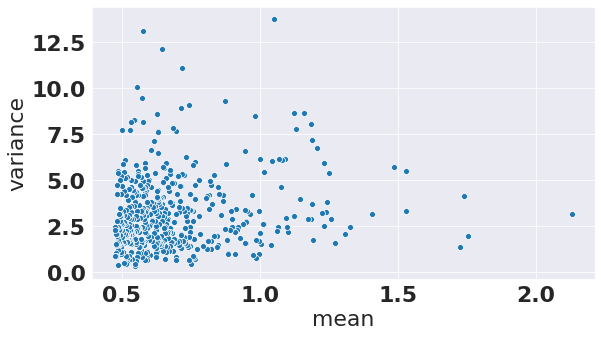

In [59]:
sns.scatterplot(data=top_500_stat,x='mean',y='variance')

#### the scatter plot shows that the protein abundance is mostly between 0.5 to 1.0 and variance between 0 to 0.5. 

###### an issue with this dataset is the inadequate number of Normal samples for comparision with tumor samples

In [60]:
reshaped_proteome_positive.columns

Index(['NP_958782', 'NP_958785', 'NP_958786', 'NP_000436', 'NP_958781',
       'NP_958780', 'NP_958783', 'NP_958784', 'NP_001611', 'NP_076965',
       ...
       'NP_062558', 'NP_665813', 'NP_001165887', 'NP_001010893', 'NP_000871',
       'NP_690872', 'NP_699174', 'NP_932347', 'NP_003593', 'Type'],
      dtype='object', length=5083)

In [61]:
x=pd.value_counts(reshaped_proteome_positive['Type'])
x.index=['Tumor','Normal']
x

Tumor     80
Normal     3
Name: Type, dtype: int64

In [62]:
!pip install imblearn

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
sm = SMOTE(random_state=42)

#### beginning series of manipulations to balance the dataset

In [65]:
mant=reshaped_proteome_positive[reshaped_proteome_positive['Type']==1].copy()

In [204]:
mant

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_001611,NP_076965,...,NP_062558,NP_665813,NP_001165887,NP_001010893,NP_000871,NP_690872,NP_699174,NP_932347,NP_003593,Type
263d3f-I.CPTAC,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,2.778263,3.846468,...,1.369315,0.3312,0.636445,0.215623,2.204948,2.396955,-1.689267,0.142576,0.319917,1
blcdb9-I.CPTAC,-0.191285,-0.183918,-0.186022,-0.186022,-0.167079,-0.183918,-0.186022,-0.186022,1.367330,1.088442,...,-0.854301,0.3312,-0.757479,0.215623,-1.322622,-2.042468,-1.459435,0.142576,0.319917,1
c4155b-C.CPTAC,0.566975,0.578702,0.576747,0.576747,0.576747,0.578702,0.576747,0.576747,3.215190,3.480988,...,-0.081886,0.3312,0.574793,0.215623,1.329192,1.260788,-1.829121,0.142576,0.319917,1


In [66]:
mant2=pd.concat([mant,reshaped_proteome_positive[reshaped_proteome_positive['Type']==1]],axis=0)
mant2.iloc[-3:,:].index=["dummy1","dummy2","dummy3"]
mant2.shape

(6, 5083)

In [67]:
tumor=reshaped_proteome_positive.iloc[:-3,:]
tumor.shape

(80, 5083)

In [68]:
mant3=pd.concat([tumor,mant2],axis=0)
mant3.shape

(86, 5083)

In [69]:
X=mant3.iloc[:,:-1]
X.shape

(86, 5082)

In [70]:
y=mant3.iloc[:,-1]
y.shape

(86,)

In [71]:
X_resample,y_resample=sm.fit_resample(X,y)

In [72]:
from collections import Counter

### original sample distribution

In [73]:
counter=Counter(y)
print(counter)

Counter({0: 80, 1: 6})


### sample distribution after resampling

In [74]:
counter=Counter(y_resample)
print(counter)

Counter({0: 80, 1: 80})


In [75]:
resampled_proteome=pd.merge(X_resample, y_resample, left_index=True, right_index=True)

In [76]:
resampled_proteome.shape

(160, 5083)

In [77]:
resampled_proteome.head(n=3)

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_001611,NP_076965,...,NP_062558,NP_665813,NP_001165887,NP_001010893,NP_000871,NP_690872,NP_699174,NP_932347,NP_003593,Type
0,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,0.482754,0.261785,...,0.825636,0.840875,0.932310,0.215623,0.873164,1.075726,-0.034061,0.142576,-0.340163,0
1,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,-1.045294,-0.037371,...,0.136688,1.468441,1.229616,0.215623,0.873164,1.075726,-0.034061,0.142576,3.451902,0
2,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,1.222003,1.019685,...,1.887156,-0.837202,0.756395,0.215623,0.873164,1.075726,-0.034061,0.142576,-1.718531,0


### Finally resampled dataset to see if differences in tumor and normal samples can be understood

In [78]:
tumor=resampled_proteome[resampled_proteome.Type==0]

In [79]:
normal=resampled_proteome[resampled_proteome.Type==1]

In [80]:
tumor.shape,normal.shape

((80, 5083), (80, 5083))

In [81]:
mean_tumor=tumor.iloc[:,:-1].mean()
var_tumor=tumor.iloc[:,:-1].var()
tumor_df=pd.concat([mean_tumor,var_tumor],axis=1)

In [82]:
tumor_df.columns=['mean','variance']
tumor_df['Type']=0
tumor_df.head()

,mean,variance,Type
NP_958782,0.320062,0.985263,0
NP_958785,0.326656,0.991921,0
NP_958786,0.326232,0.991648,0
NP_000436,0.323387,0.988658,0
NP_958781,0.326678,0.993241,0


In [83]:
mean_normal=normal.iloc[:,:-1].mean()
var_normal=normal.iloc[:,:-1].var()
normal_df=pd.concat([mean_normal,var_normal],axis=1)

In [84]:
normal_df.columns=['mean','variance']
normal_df['Type']=1
normal_df.head()

,mean,variance,Type
NP_958782,0.290774,0.096794,1
NP_958785,0.299734,0.097392,1
NP_958786,0.297490,0.097328,1
NP_000436,0.297490,0.097328,1
NP_958781,0.304636,0.092643,1


In [96]:
positive_normal_df=normal_df[normal_df['mean']>=0]

In [98]:
resampled_data_stats=pd.concat([tumor_df,positive_normal_df],axis=0,join='outer')
tumor_df.shape,positive_normal_df.shape,resampled_data_stats.shape

((5082, 3), (3615, 3), (8697, 3))

<Figure size 720x360 with 0 Axes>

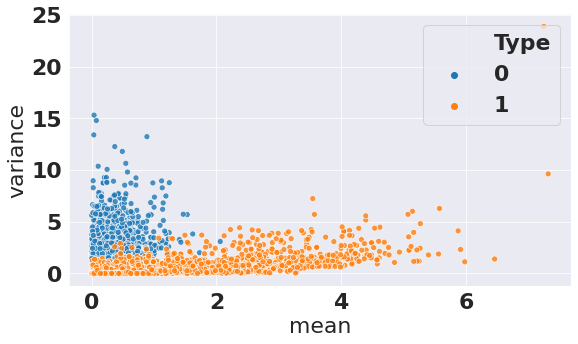

In [119]:
plt.figure(figsize=(10,5))
fig,axs=plt.subplots()
axs=sns.scatterplot(data=resampled_data_stats,x='mean',y='variance',hue='Type',alpha=0.8)
axs.legend(loc='upper right')

### The scatterplot clearly shows that many protein levels are less abundant in cancer samples as compared to normal samples, and there is a lot of variation in the protein levels in cancer samples

In [120]:
tumor_df.shape, positive_normal_df.shape

((5082, 3), (3615, 3))

In [126]:
tumor_df.columns=['mean_cancer','variance_cancer','Type']
tumor_df.head()

,mean_cancer,variance_cancer,Type
NP_958782,0.320062,0.985263,0
NP_958785,0.326656,0.991921,0
NP_958786,0.326232,0.991648,0
NP_000436,0.323387,0.988658,0
NP_958781,0.326678,0.993241,0


In [127]:
positive_normal_df.columns=['mean_normal','variance_normal','Type']
positive_normal_df.head()

,mean_normal,variance_normal,Type
NP_958782,0.290774,0.096794,1
NP_958785,0.299734,0.097392,1
NP_958786,0.297490,0.097328,1
NP_000436,0.297490,0.097328,1
NP_958781,0.304636,0.092643,1


In [135]:
combined_dataset=pd.merge(tumor_df,positive_normal_df,how='outer',left_index=True,right_index=True)

### For proteins which are absent we are filling with a value tending to 0 but not 0 to prevent calculation runtime errors. Evidently the variance for absent proteins would also tend to 0

In [137]:
combined_dataset=combined_dataset.fillna(0.000000001)

In [140]:
combined_dataset.isna().sum()

mean_cancer        0
variance_cancer    0
Type_x             0
mean_normal        0
variance_normal    0
Type_y             0
dtype: int64

In [141]:
combined_dataset.head(n=3)

,mean_cancer,variance_cancer,Type_x,mean_normal,variance_normal,Type_y
NP_000005,0.048255,4.697138,0,4.179809,1.039250,1.0
NP_000009,0.283071,1.290938,0,1.648958,0.062120,1.0
NP_000010,0.222972,1.853686,0,1.938121,0.201877,1.0


In [157]:
combined_dataset['fold_change']=(combined_dataset.mean_cancer-combined_dataset.mean_normal)/combined_dataset.mean_cancer

In [158]:
combined_dataset.head()

,mean_cancer,variance_cancer,Type_x,mean_normal,variance_normal,Type_y,fold_change
NP_000005,0.048255,4.697138,0,4.179809,1.039250,1.0,-85.619984
NP_000009,0.283071,1.290938,0,1.648958,0.062120,1.0,-4.825252
NP_000010,0.222972,1.853686,0,1.938121,0.201877,1.0,-7.692205
NP_000013,0.468616,1.803175,0,0.919465,0.284713,1.0,-0.962088
NP_000020,0.509921,3.707268,0,3.681410,1.454566,1.0,-6.219574


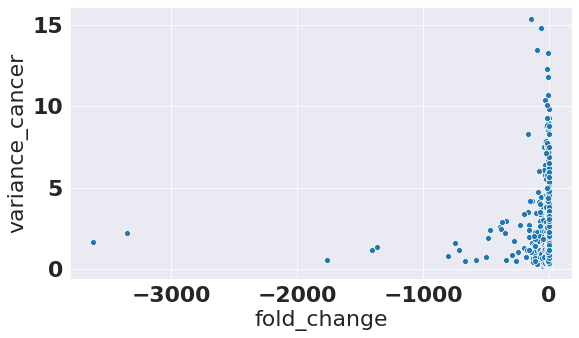

In [159]:
plt.figure()
axs=sns.scatterplot(data=combined_dataset,x='fold_change',y='variance_cancer')
plt.show()

### The scatter plot shows that for most proteins, there is no significant change in Cancer samples from Normal samples. except there are few proteins whose levels reduce 500 fold in cancer, and the variance is also low. These protein are a strong candidate for detecting cancer

In [160]:
combined_dataset[combined_dataset.fold_change<-500]

,mean_cancer,variance_cancer,Type_x,mean_normal,variance_normal,Type_y,fold_change
NP_000366,0.003034,0.795011,0,2.446013,0.297998,1.0,-805.157384
NP_001034937,0.001573,1.578271,0,1.175781,0.277206,1.0,-746.389161
NP_001238978,0.002604,0.514008,0,1.730273,0.088907,1.0,-663.440350
NP_003976,0.000158,1.180201,0,0.220923,0.044384,1.0,-1401.617516
NP_004116,0.000755,1.177645,0,0.540913,0.007847,1.0,-715.206227
NP_005398,0.000129,1.656127,0,0.465989,0.012714,1.0,-3621.970408
NP_055623,0.001402,0.760611,0,0.703767,0.644973,1.0,-501.117244
NP_056450,0.000575,0.564933,0,0.336278,0.055196,1.0,-583.790178
NP_057594,0.000970,1.374930,0,1.321929,0.231621,1.0,-1361.578189
NP_060493,0.000754,0.565353,0,1.330978,0.162838,1.0,-1764.361325


## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: What can we infer from this Dataset ?

##### from the protein abundance by iTRAQ, we can see that few proteins have high abundance and low variance in the samples. These can be excellent markers to tumor, if these are low in Normal samples

#### Q2: Can we take iTRAQ values in toto ?

##### No. the data had to be processed, especially intriguing are the negative values for sample abundance. These can confound our interpretation

#### Q3: Is there a pattern in Protein levels in cancer samples ?

#### many protein levels are less abundant in cancer samples as compared to normal samples, and there is a lot of variation in the protein levels in cancer samples

#### Q4: is there a pattern in Protein levels in Normal samples ?

####  many proteins are more abundant in Normal samples and they have steady levels from sample to sample

#### Q5: can we find some proteins which we can use to predict the presence of Cancer in unknown samples ?

#### Yes. There are few proteins which can be used to predict the presence of Cancer

In [161]:
marker_proteins=combined_dataset[combined_dataset.fold_change<-500]

In [167]:
mrk_prt_lst=marker_proteins.index.tolist()

In [170]:
proteome[proteome.RefSeq_accession_number.isin(mrk_prt_lst)]

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
1192,NP_056450,GAPVD1,GTPase-activating protein and VPS9 domain-cont...,-0.435408,-0.179047,0.094013,-0.734676,3.120356,0.442797,0.873949,...,-0.127409,-0.671093,-1.048598,-0.546550,0.282105,-0.632539,-0.318121,-0.015295,0.297032,0.733099
1617,NP_005398,SALL2,sal-like protein 2,-0.241108,0.711487,2.095017,-2.594708,2.470942,1.898339,-2.264714,...,-0.706960,-1.121354,2.963974,-1.441668,NaN,NaN,NaN,0.482299,0.611702,0.273815
3207,NP_060493,YEATS2,YEATS domain-containing protein 2,-0.164912,0.298603,-0.429796,0.439554,0.470222,-0.939601,-0.172272,...,-0.361513,0.017163,0.204153,-1.133350,1.433147,1.192665,1.138713,1.837161,0.723257,1.561766
4301,NP_057594,NaN,selenocysteine lyase,-0.984019,-1.429842,2.203104,-0.450318,-1.438662,-1.009087,0.926637,...,2.464870,-0.503853,0.552663,1.177381,1.045645,1.480502,0.840792,2.123819,0.719047,1.252970
4688,NP_055623,FARP2,"FERM, RhoGEF and pleckstrin domain-containing ...",-0.515413,-0.871235,0.204872,-1.728254,-0.658053,-0.486116,0.960507,...,0.614874,-0.905872,-0.734626,-1.481451,-0.284244,-0.708403,-1.408512,1.198943,-0.525950,1.696620
5460,NP_001238978,NaN,protein-L-isoaspartate(D-aspartate) O-methyltr...,-0.340163,-0.664793,1.111144,-0.082326,0.332467,1.477768,-0.059370,...,1.123052,0.296968,-1.576073,-0.394048,0.155995,1.076637,0.188345,1.455853,1.493619,2.288803
6090,NP_003976,TNK1,non-receptor tyrosine-protein kinase TNK1 isof...,0.810396,-0.393585,1.088972,-1.490732,-0.074236,1.722796,2.398121,...,0.803299,-2.944911,-2.222857,-2.903694,NaN,NaN,NaN,-0.164033,0.403325,0.383262
7167,NP_001034937,GPX4,phospholipid hydroperoxide glutathione peroxid...,-1.140220,0.007156,2.433137,-0.523916,-1.307467,-2.095257,0.204067,...,2.678990,0.988440,0.292065,1.197273,1.889436,-0.061326,1.132754,0.682418,0.765353,2.161767
7663,NP_000366,UROS,uroporphyrinogen-III synthase,-0.648756,1.039365,-0.316165,-0.901945,1.595217,0.146569,0.983088,...,-0.789753,-0.815820,-0.037606,0.554114,0.855333,0.123872,0.325388,2.591666,1.653584,3.258187
10016,NP_065835,TXNDC16,thioredoxin domain-containing protein 16 isofo...,NaN,NaN,NaN,2.808084,0.988441,-0.723830,0.527718,...,0.666263,NaN,NaN,NaN,NaN,NaN,NaN,1.666789,0.688527,0.619744


Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

## From a Dataset of 12,000 Protein abundance values in a imbalanced dataset of 80 Cancer samples and 3 Normal samples, we narrowed down to a actionable set of 11 proteins which can be used as markers to detect Cancer

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'